In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as sps
import statsmodels.api as sm
from collections import Counter
%matplotlib inline

#Mafia

## Introduction

[Mafia](https://en.wikipedia.org/wiki/Mafia_(party_game) is a great party game. If you haven't played it before, I highly encourage you to click on the link, find out more, and possibly suggest/direct a game at the next possible convenience. The game is also called Werewolves, and there are a wide variety of rules by which the game can be played (sometimes dependent upon the number of people involved), but the fundamentals are largely the same.

### Rules

The game revolves around two stages: Day and Night, and the players are divided into two groups: townspeople and mafia . The assignment of townspeople and mafia, as well as the overall moderator of events and cycling of stages is conducted by a narrator.

<img src="https://m2.behance.net/rendition/pm/398169/disp/06d0a58dd7aca6c2c1e01c677d806bca.png">

### Here's how the story goes...

During the day, the townspeople, and mafia masquerading as townspeople, deliberate on whom they suspect as being guilty of mafia membership. They arrive at a decision - usually through some sort of haphhazard voting process - and subsequently kill a member of their own town. (FUN!) Then the night comes, at which time the narrator will 'awaken' the mafia members, who will then silently pick a member of the townspeople to kill. The mafia "goes back to sleep" as directed by the narrator, and the cycle of lynching continues as the narrator informs the townspeople of their newly fallen companion, until the point is reached at which either the mafia are completely eliminated, or they are equal to/greater in number than the townspeople and thus able to overrun the town.

### Rationalism: it's not dramatic enough

I've played this game several times and each time I play, I've tried to employ some sort of rationally informed strategy to eliminate the mafia as quickly as possible. This has been an overwhelmingly unpopular stance to take, as I've been informed of several times. But seeing as this is the internet, and all opinions are welcome here, I thought I'd formalize my thoughts for a rational approach to playing the game (albeit a simplified version of the true game).

<img src="http://www.quickmeme.com/img/5a/5a2462f99146c7f91413369343b7cc1615d039821913abbf4d39aff4e1e19bbf.jpg">

## Its all about the voting trends

There is really only one$^{1}$ piece of evidence a townperson has to go on that is easily measurable: the voting patterns. This is *assuming* that the mafia will always avoid voting for their own teammate. Lets make some mathematical definitions, to be cool.

$$
n = \text{ total number of residents in the town } \\
\text{ let's identify the set of all residents } = R = \{i : 1 \leq i \leq n  \} \\
\text{ the set of all mafiosos } = M = \{ i : 1 \leq i \leq n, i \notin T \} \\
\text{ the set of all townspeople } = T = \{ i : 1 \leq i \leq n , i \notin M \} \\
\text{ the set of dead people} = D = \{ i : 1 \leq i \leq n, i \notin R \} \\
|M| = \lfloor \frac{1}{5}n \rfloor, \hspace{ 3 mm }|T| = \lceil \frac{4}{5}n \rceil \\ 
|D| = 0 \text{ at the beginning of the game }
$$

These may or may not be valid assumptions depending upon the game you're playing, but one fifth is roughly the proportion of mafia I've seen played with so... let's just go with that for funsies. In fact, while we're at it, lets make some further assumptions.

$$
\text{ Townperson vote: TVN}_{i} \sim Uniform(R \hspace{1 mm } -  \hspace{ 1 mm}  D -t_{i}) \\
\text{ Mafia vote: MVN} \sim Uniform( T \hspace{ 1 mm } -  \hspace { 1 mm } D)
$$

Here we're basically suggesting that a townsperson will vote for any person (or vote for any number) provided they are not dead or themself, without giving preference to any one individual over another. Meanwhile, the Manfia will vote for any number, provided they are not in the mafia.

Again, it is worth noting that these assumptions do not map perfectly to the real world. We all know that one person who will unceasingly attack you at the start of every mafia round, eager to remove you from the game- clearly exhibiting a bias of dickery.  

Additionally, mafia members have been known to be super mischevious and vote for their own members in the hope that they might remove suspicion of any possible allegiance between them and a possibly condemned individual. Alas, I have no patience to model such complexity, so we'll continue forward undeterred.

Now what is it exactly that we're going to be looking for? Well we're going to run a little simulation of this game and look at the individual voting record for each person, and see if it conforms to a random uniform distribution for the entire group. 

We'll stick with a game of 15 people, since the number of voting trials can get quite large as you increase the number of random votes - you have to do a lot of revoting to get a majority poll.
Let's look at the distribution of votes for a mafioso and a townsperson 

In [55]:
from Mafia import Town,Resident
np.random.seed(3)

In [56]:
n = 15
t = Town(n)
t.initiate_game()
votes = pd.DataFrame.from_dict(t.voting_log_)
votes.columns = [str(i) for i in range(1,n+1)]

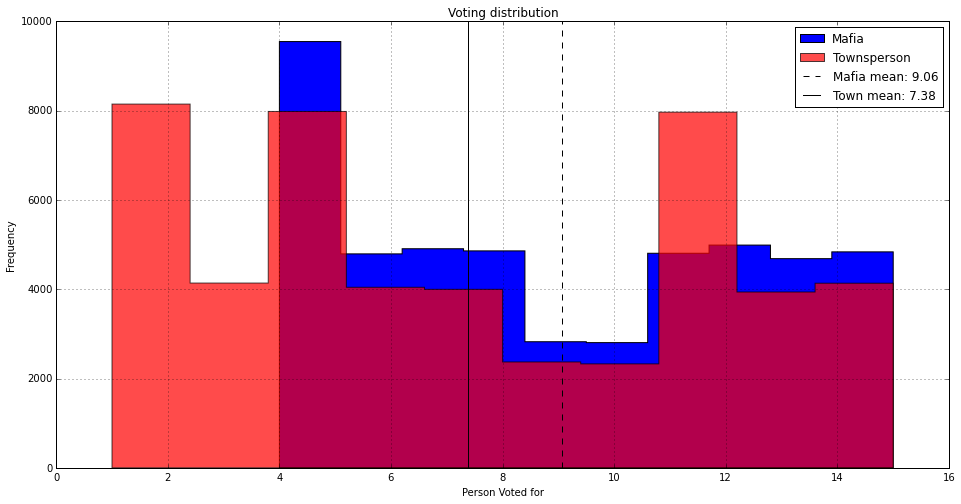

In [97]:
plt.figure(figsize=(16,8))
votes["1"].hist(label="Mafia",histtype='stepfilled')
votes["8"].hist(label="Townsperson",alpha=0.7,color='red',histtype='stepfilled')
mafia_mean = round(votes["1"].mean(),2)
town_mean = round(votes["8"].mean(),2)
plt.vlines([mafia_mean],0,10000,'black',linestyle='--',label="Mafia mean: " + str(mafia_mean))
plt.vlines(town_mean,0,10000,'black',linestyle='-', label="Town mean: " + str(town_mean))
plt.xlim([0,16])
plt.title("Voting distribution")
plt.xlabel("Person Voted for")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

### Well thats...obvious

Yeah, go figure. If you have the advantage of seeing someone vote a few *thousand* times, then it becomes pretty obvious where their loyalties lie. The mafia bars don't even touch 1 or 2 (other mafia members) and, looking at the mean bars, the Mafia mean is ~2 points higher than the town person; thats a pretty clear difference.

So at least we know we can determine the difference between these folks at the **end** of the game. But lets say you'd want to figure this out while playing the game. You know, so you can win. Well determining that is a little tricky.

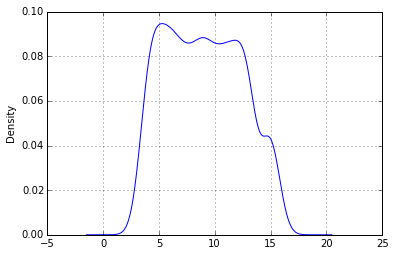

In [98]:
votes.loc[0:1000,"1"].plot(kind='kde')